In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
from matplotlib.colors import LogNorm

import timeit
import Double_Null_utils as dnu
from scipy import optimize
import tables
import h5py



#import warnings
#warnings.filterwarnings("ignore")

start = timeit.default_timer()

In [2]:
uscal=1
vscal=1

In [3]:
rnputil=np.load('rnputil.npy')
wHD=rnputil[8]
print(wHD)

if wHD==True or wHD==1.0:
    urange=np.load('urange.npy')[::uscal]
    vrange=np.load('vrange.npy')[::vscal]
if wHD==False or wHD==0.0 or wHD==None:
    urange=np.load('urange.npy')
    vrange=np.load('vrange.npy')


1.0


In [4]:
if wHD==True or wHD==1.0:
    with h5py.File('rnp.h5','r') as f:
        r_group_key = list(f.keys())[0]
        rnpi=f[r_group_key]
        rnp = np.asarray(rnpi[::uscal,::vscal])
    with h5py.File('signp.h5','r') as f:
        sig_group_key = list(f.keys())[0]
        signpi=f[sig_group_key]
        signp = np.asarray(signpi[::uscal,::vscal])
    with h5py.File('phinp.h5','r') as f:
        phi_group_key = list(f.keys())[0]
        phinpi=f[phi_group_key]
        phinp = np.asarray(phinpi[::uscal,::vscal])
    with h5py.File('massnp.h5','r') as f:
        mass_group_key = list(f.keys())[0]
        massnpi=f[mass_group_key]
        massnp = np.asarray(massnpi[::uscal,::vscal])
    
    print(str(rnp.nbytes)+" bytes")
    print("Hd5 files used")

if wHD==False or wHD==0.0 or wHD==None:
    rnp=np.load('rnp.npy')
    signp=np.load('sig.npy')
    phinp=np.load('phi.npy')
    massnp=np.load('mass.npy')
    print("Numpy arrays used")

412480000 bytes
Hd5 files used


In [5]:
print(rnputil)

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)


dv0=vrange[1]-vrange[0]

def fr(r,M0,Q,Lambda):
    return 1-2*M0/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.687,1.3,50.0],args=(M0,Q,Lambda), method='hybr')
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]
    
numpoints=Nu*Nv
print(str(numpoints)+" points")

if Q==0.0:
    predtime=numpoints/(144935)
if Q>0.0:
    predtime=numpoints/(259000)
print("Runtime: about "+str(format(predtime/60,'.2f'))+" minutes")

[  5.15700000e+07   5.15700000e+03   1.00000000e+04   2.00000000e+00
   1.50416667e-01   1.00000000e+00   9.50000000e-01   0.00000000e+00
   1.00000000e+00]
51560000 points
Runtime: about 3.32 minutes


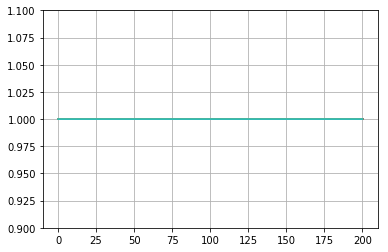

In [6]:
for line in massnp[2900:3500]:
#for line in rnp[2500:3500]:
    plt.plot(vrange,line)
#plt.plot([0,vmax],[rplus,rplus],'r--',color='red',linewidth=0.5, label='r+')
#plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5, label='r-')
plt.ylim(.9,1.1)  
#plt.ylim(.687,.69)
#plt.yscale('log')
plt.grid()
plt.show()

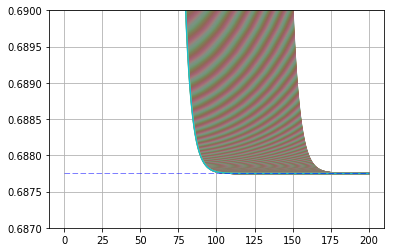

In [7]:
#for line in massnp[2900:3500]:
for line in rnp[2500:3500]:
    plt.plot(vrange,line)
#plt.plot([0,vmax],[rplus,rplus],'r--',color='red',linewidth=0.5, label='r+')
plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5, label='r-')
#plt.ylim(.9,1.1)  
plt.ylim(.687,.69)
#plt.yscale('log')
plt.grid()
plt.show()

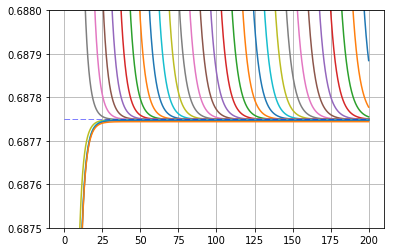

In [8]:
#for line in massnp[2900:3500]:
for line in rnp[:][::100]:
    plt.plot(vrange,line)
#plt.plot([0,vmax],[rplus,rplus],'r--',color='red',linewidth=0.5, label='r+')
plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5, label='r-')
#plt.ylim(.9,1.1)  
#plt.ylim(.687,.69)
plt.ylim(.6875,.688)
#plt.yscale('log')
plt.grid()
plt.show()

In [9]:
massdiffnp=abs(massnp[:,:]-M0)
print(massnp)
#print(signp)

[[  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.00000018e+00   1.00000018e+00 ...,   1.00000098e+00
    1.00000098e+00   1.00000098e+00]
 [  1.00000000e+00   1.00000047e+00   1.00000047e+00 ...,   1.00002198e+00
    1.00002198e+00   1.00002198e+00]
 ..., 
 [  1.00000000e+00  -2.34996340e+00   9.79486905e-01 ...,  -2.36724350e+10
   -2.17341001e+10  -1.84935602e+10]
 [  1.00000000e+00  -2.39471809e+00   9.79451516e-01 ...,  -2.41509148e+10
   -2.21675893e+10  -1.88619509e+10]
 [  1.00000000e+00  -2.43990806e+00   9.79415665e-01 ...,  -2.46359184e+10
   -2.26096661e+10  -1.92376300e+10]]


In [10]:
print(phinp)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


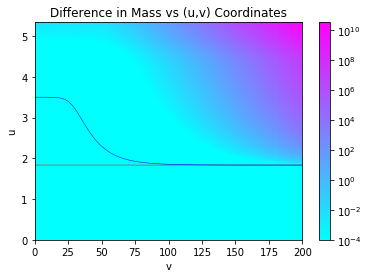

In [11]:
plot1=plt.pcolormesh(vrange,urange,np.ma.masked_invalid(massdiffnp),cmap=plt.cm.cool,norm=LogNorm(vmin=0.0001, vmax=np.nanmax(massdiffnp)))
plot5=plt.contour(vrange,urange,np.ma.masked_invalid(rnp), [rplus],linewidths=0.5,colors='red',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(vrange,urange,np.ma.masked_invalid(rnp), [rminus],linewidths=0.5,colors='blue',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plt.xlabel('v')
plt.ylabel('u')
plt.ylim(0,umax)
plt.xlim(0,vmax)
#plt.ylim(1.5,2.5)
#plt.xlim(100,200)
#plt.ylim(9.2758,9.2761)
plt.colorbar(plot1)
plt.title('Difference in Mass vs (u,v) Coordinates')
#plt.savefig('Mass-Error.png',dpi=300)
#plt.savefig('EH-mismatch.png',dpi=300)
plt.show()

[[  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.00000018e+00   1.00000018e+00 ...,   1.00000098e+00
    1.00000098e+00   1.00000098e+00]
 [  1.00000000e+00   1.00000047e+00   1.00000047e+00 ...,   1.00002198e+00
    1.00002198e+00   1.00002198e+00]
 ..., 
 [  1.00000000e+00  -2.34996340e+00   9.79486905e-01 ...,  -2.36724350e+10
   -2.17341001e+10  -1.84935602e+10]
 [  1.00000000e+00  -2.39471809e+00   9.79451516e-01 ...,  -2.41509148e+10
   -2.21675893e+10  -1.88619509e+10]
 [  1.00000000e+00  -2.43990806e+00   9.79415665e-01 ...,  -2.46359184e+10
   -2.26096661e+10  -1.92376300e+10]]
32535383421.0
5213916.01409


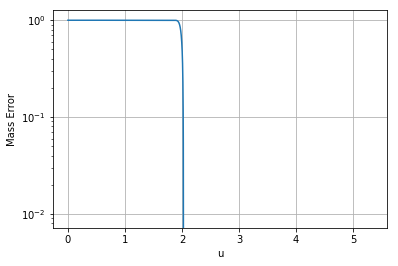

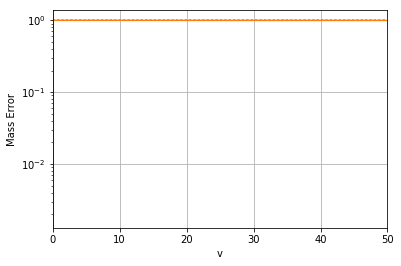

279002.65513

In [12]:
#print(massdiffnp)
print(massnp)
print(np.nanmax(massdiffnp))
print(np.nanmean(massdiffnp))
#print(massdiffnp[-10])

plt.plot(urange,massnp[:,-1])
plt.yscale('log')
plt.ylabel('Mass Error')
plt.xlabel('u')
plt.grid()
plt.show()

plt.plot(vrange,massnp[1,:],':')
plt.plot(vrange,massnp[-1,:])
plt.yscale('log')
plt.ylabel('Mass Error')
plt.xlabel('v')
plt.xlim(0,50)
plt.grid()
plt.show()


1897154954.72
13851032.0928
54530507.1436
13851032.0928
#Tol=2, Nul=2000, N=10 9.128 min
13730096.5359
#Tol=.2, Nul=200, 5.671 min
13851032.0928
#Tol=1, Nul=200, 1.122 min
336154711.505
256500.649449
#Tol=1, Nul=2000, 11.938 min
4538541.30462
3379.12875389
#Tol=1, Nul=200, N=100, 11.029 min - full
627615304.428
279002.65513

In [13]:
sig2np=np.zeros((Nu,Nv))
sigdiffnp=np.zeros((Nu,Nv))

sig2np[:,:]=np.log(1-2*M0/rnp[:,:]+Q**2/rnp[:,:]**2-Lambda*rnp[:,:]**2/3)

sigdiffnp[:,:]=abs(signp[:,:]-sig2np[:,:])

D:\Jupyter_Notebooks\python-3.6.1.amd64\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in log


D:\Jupyter_Notebooks\python-3.6.1.amd64\lib\site-packages\matplotlib\colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


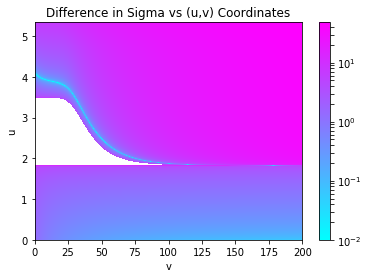

In [14]:
plot1=plt.pcolormesh(vrange,urange,np.ma.masked_invalid(sigdiffnp),cmap=plt.cm.cool,norm=LogNorm(vmin=0.01, vmax=np.nanmax(sigdiffnp)))
plt.xlabel('v')
plt.ylabel('u')
#plt.xlim(0,20)
plt.ylim(0,umax)
plt.xlim(0,vmax)
#plt.ylim(9.2758,9.2761)
plt.colorbar(plot1)
plt.title('Difference in Sigma vs (u,v) Coordinates')
#plt.savefig('EH-mismatch.png',dpi=300)
plt.show()

In [15]:
print(sigdiffnp)
print(np.nanmax(sigdiffnp))

[[  1.48888095   1.48523252   1.48160378 ...,   0.06344891   0.06344286
    0.0634368 ]
 [  1.48897216   1.48532373   1.48169499 ...,   0.06354012   0.06353407
    0.06352801]
 [  1.49354852   1.48990009   1.48627135 ...,   0.06811648   0.06811043
    0.06810437]
 ..., 
 [ 13.69674578   5.98339517   5.9851086  ...,  48.11808855  48.12232659
   48.12656461]
 [ 17.6253053    6.00346249   6.00517515 ...,  48.14118002  48.14541806
   48.14965608]
 [ 14.36732448   6.02352968   6.02524158 ...,  48.16425225  48.16849029
   48.17272831]]
48.1727283067


In [16]:
def ce1checker(rnp,signp,i):
    checklist=np.empty((Nv-2))*np.nan
    for j in range(0,Nv-2):
        checklist[j]=1/dv0**2*(rnp[i][j+2]-2*rnp[i][j+1]+rnp[i][j]-(rnp[i][j+1]-rnp[i][j])*(signp[i][j+1]-signp[i][j]))
    return checklist
def ce2checker(rnp,signp,j):
    checklist=np.empty((Nu-2))*np.nan
    for i in range(0,Nu-2):
        checklist[i]=1/((urange[i+1]-urange[i])*(urange[i+2]-urange[i+1]))*((rnp[i+2][j]-2*rnp[i+1][j]+rnp[i][j])-(rnp[i+1][j]-rnp[i][j])*(signp[i+1][j]-signp[i][j]))
    return checklist


print(ce1checker(rnp,signp,3500))
print(np.nanmax(np.abs(ce1checker(rnp,signp,3500))))
print(ce2checker(rnp,signp,0))
print(np.nanmax(np.abs(ce2checker(rnp,signp,0))))

[ -5.85265566e-08  -5.84388864e-08  -5.83492846e-08 ...,  -5.41717632e-11
  -9.49454902e-11  -1.44495183e-10]
2.30345070258e-06
[ -1.83750000e+03   0.00000000e+00   0.00000000e+00 ...,   5.12133770e-01
   5.13382329e-01   5.14641471e-01]
700037.6193


D:\Jupyter_Notebooks\python-3.6.1.amd64\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


In [17]:
u5=1000
v5=1200

du0=urange[u5+1]-urange[u5]
dv0=vrange[v5+1]-vrange[v5]
print(du0)
print(dv0)

rnpnew=np.array([[rnp[u5][v5],rnp[u5][v5+1]],[rnp[u5+1][v5],2]])
signpnew=np.array([[signp[u5][v5],signp[u5][v5+1]],[signp[u5+1][v5],2]])
phinpnew=np.array([[0,0],[0,0]])

print(rnpnew)
print(signpnew)

print(dnu.x4giveralt(0,0,du0,dv0,rnpnew,phinpnew,signpnew,1.0,.95,0.0,np.float64))
print(massnp[u5][v5])

5.39798953514e-06
0.02
[[ 1.31600969  1.3160158 ]
 [ 1.31597709  2.        ]]
[[ 1.68738258  1.68876787]
 [ 1.68737812  2.        ]]


TypeError: x4giveralt() missing 1 required positional argument: 'datatype'

In [ ]:
print(rnp[1][0])

In [ ]:
#u=1,v=1
M2=1.0000231
M3=1.0000002 
M4=1.0000119 #increase v res
M5=1.0000010 #increase u res
###############
#u=10,v=10
M2=1.0000229
M3=1.0000002
M4=1.0000139
M5=1.0000098